In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("full_data.csv")

In [4]:
frame = DataFrame(data)
frame

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
5,6,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,Less than HS
6,7,2012,2,Undetermined,0,M,48.0,White,100,Home,HS/GED
7,8,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,HS/GED
8,9,2012,2,Accidental,0,M,50.0,White,100,Other specified,Some college
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,NaN


In [5]:
frame.groupby('year').size()

year
2012    33563
2013    33636
2014    33599
dtype: int64

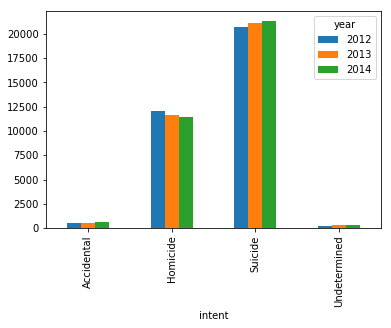

In [6]:
intent_year = frame.groupby(['intent', 'year']).size()
intent_year.unstack('year').plot(kind='bar')
plt.show()

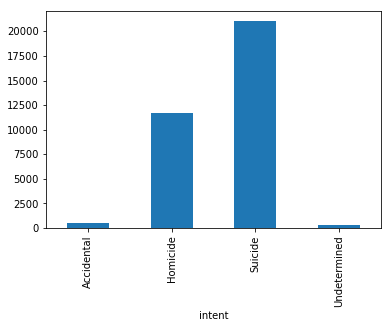

In [7]:
intent_avYear = frame.groupby(['intent','year']).size()
intent_avYear.unstack('intent').mean().plot(kind='bar')
plt.show()

In [8]:
intent_MvsF = frame.groupby(['intent', 'sex']).size()
intent_MvsF = intent_MvsF.unstack('sex')
intent_MvsF

sex,F,M
intent,,
Accidental,218,1421
Homicide,5373,29803
Suicide,8689,54486
Undetermined,169,638


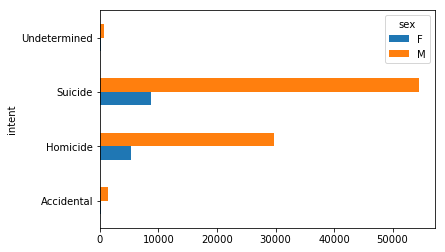

In [9]:
intent_MvsF.plot(kind='barh')
plt.show()

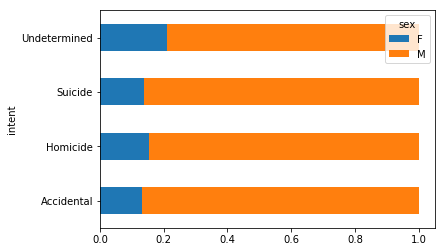

In [10]:
intent_MvsF_normed = intent_MvsF.div(intent_MvsF.sum(1), axis=0)
intent_MvsF_normed.plot(kind='barh', stacked=True)
plt.show()

In [11]:
intent_race=frame.groupby(['intent', 'race']).size()
intent_race.unstack('race')

race,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
intent,,,,,
Accidental,12,328,145,22,1132
Homicide,559,19510,5634,326,9147
Suicide,745,3332,3171,555,55372
Undetermined,10,126,72,14,585


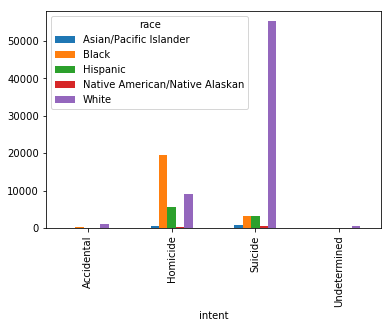

In [103]:
intent_race.unstack('race').plot(kind='bar')
plt.show()

In [104]:
homicides_idx = frame['intent'] == "Homicide"
homicides = frame[homicides_idx]
young_idx = (15 < frame['age']) & (frame['age'] < 34) 
h_y_f = frame[young_idx & homicides_idx]
print("Pourcentage of young men in homicides : ", len(h_y_f)/len(homicides)*100)


Pourcentage of young men in homicides :  59.347282237889466


In [105]:
t = frame.groupby(['intent', 'age', 'year']).size()
t_mean = t.unstack(['intent', 'age']).mean()
t_mean_homicide = t_mean.loc['Homicide']
num_y_h = t_mean_homicide[15:34].sum()
num_h = t_mean_homicide.sum()
print("Pourcentage of young men in homicides (mean) : ", num_y_h/num_h*100)

Pourcentage of young men in homicides (mean) :  62.548679609994586
